 # Introduction

Term deposits play a vital role in generating income for banks. These cash investments are held by financial institutions and offer customers a fixed rate of interest over a specific period. To maximize the number of term deposit subscriptions, banks employ various outreach strategies such as email marketing, advertisements, telephonic marketing, and digital marketing. Among these, telephonic marketing campaigns have proven to be highly effective in reaching potential customers. However, they require significant investment, including the establishment of call centers for campaign execution.

In this project, our goal is to predict whether a client will subscribe to a term deposit. By analyzing a comprehensive dataset, we aim to build a predictive model that can identify potential subscribers and optimize the bank's telephonic marketing campaigns. This model will help the bank allocate its resources more efficiently, targeting individuals who are more likely to subscribe to a term deposit and reducing the overall cost of the campaign.

By leveraging machine learning techniques and utilizing various features such as customer demographics, previous marketing interactions, and other relevant factors, we can create a powerful predictive model. This model will enable the bank to make data-driven decisions, increase the success rate of its telephonic marketing campaigns, and ultimately enhance its overall profitability.

Through this project, we aim to contribute to the bank's success by providing actionable insights and empowering them to make informed marketing decisions. By accurately identifying potential term deposit subscribers, the bank can focus its efforts on the most promising leads, resulting in higher conversion rates and increased customer satisfaction.

Let's dive into the data analysis and modeling process to develop a robust predictive model for term deposit subscription prediction

## Dataset Features:

1 - age: client age in years

2 - job: ('admin','blue-collar','entrepreneur','housemaid','management','retired','self employed','services','student','technician','unemployed','unknown')

3 - marital: ('divorced','married','single','unknown')

4 - education: (primary, secondary, tertiary and unknown)

5 - default: has credit in default? ('no','yes','unknown')

6 - housing: has housing loan? ('no','yes','unknown')

7 - loan: has personal loan? ('no','yes','unknown')

8 - balance: Balance of the individual.

# Connections

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

## Get Data

In [2]:
td = pd.read_csv("Term Deposit.csv")

# EDA - Exploratory Data Analysis

In [3]:
td.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [4]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [5]:
#Check if there are NA values.
td.isnull().sum().any()

False

In [6]:
#Check if there are duplicate values.
td.duplicated().sum()

0

Now, there is no missing/duplicate data.

In [7]:
#Drop unused columns  
td=td.drop(['ID'],axis=1)

In [8]:
#Check the count of unknown values
unknown_counts = (td == "unknown").sum()
unknown_counts/len(td)*100

age            0.000000
job            0.650931
marital        0.000000
education      4.152052
default        0.000000
balance        0.000000
housing        0.000000
loan           0.000000
contact       28.998009
day            0.000000
month          0.000000
duration       0.000000
campaign       0.000000
pdays          0.000000
previous       0.000000
poutcome      81.931937
subscribed     0.000000
dtype: float64

In [9]:
td['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

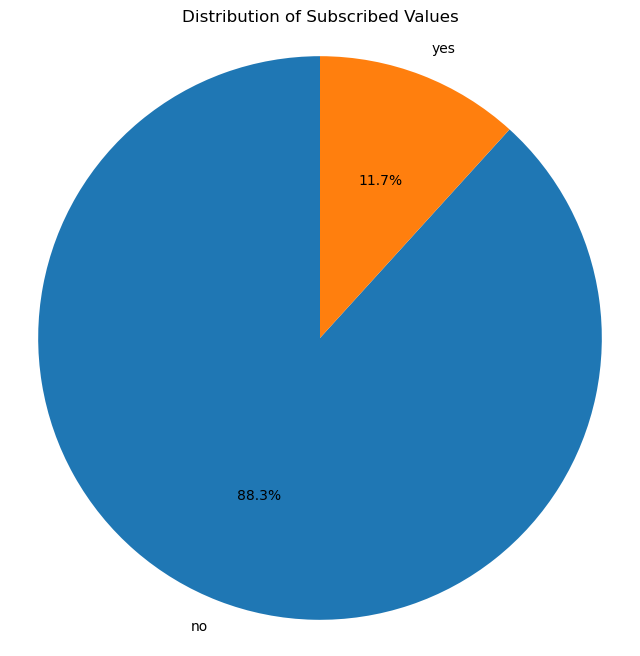

In [10]:
# Count the occurrences of each value in the 'subscribed' column
subscribed_counts = td['subscribed'].value_counts()

# Plot the counts using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(subscribed_counts, labels=subscribed_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Subscribed Values')
plt.show()


The data is unpalanced

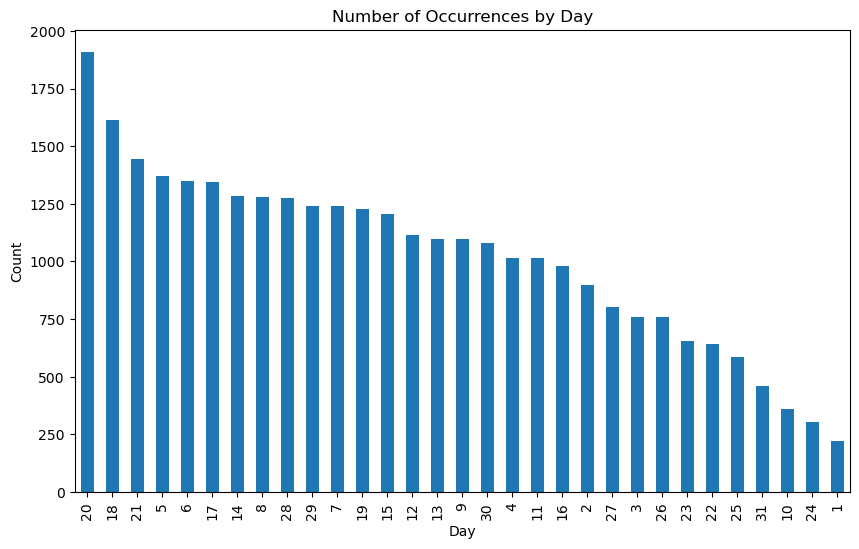

In [11]:
# Count the occurrences of each day
day_counts = td['day'].value_counts()

# Plot the counts using a bar plot
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Number of Occurrences by Day')
plt.show()


Many clients have been called on the same day so I will convert day column to categorical  

In [12]:
td['day'] = td['day'].astype(str)

In [13]:
td.describe().T

,count,mean,std,min,25%,50%,75%,max
age,31647.0,40.957247,10.625134,18.0,33.0,39.0,48.0,95.0
balance,31647.0,1363.890258,3028.304293,-8019.0,73.0,450.0,1431.0,102127.0
duration,31647.0,258.113534,257.118973,0.0,104.0,180.0,318.5,4918.0
campaign,31647.0,2.765697,3.113830,1.0,1.0,2.0,3.0,63.0
pdays,31647.0,39.576042,99.317592,-1.0,-1.0,-1.0,-1.0,871.0
previous,31647.0,0.574272,2.422529,0.0,0.0,0.0,0.0,275.0


In [14]:
numerical_data = td.select_dtypes(exclude="object")
numerical_data.head()

,age,balance,duration,campaign,pdays,previous
0,56,1933,44,2,-1,0
1,31,3,91,2,-1,0
2,27,891,240,1,-1,0
3,57,3287,867,1,84,3
4,31,119,380,1,-1,0


In [15]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,31647.0,40.957247,10.625134,18.0,33.0,39.0,48.0,95.0
balance,31647.0,1363.890258,3028.304293,-8019.0,73.0,450.0,1431.0,102127.0
duration,31647.0,258.113534,257.118973,0.0,104.0,180.0,318.5,4918.0
campaign,31647.0,2.765697,3.113830,1.0,1.0,2.0,3.0,63.0
pdays,31647.0,39.576042,99.317592,-1.0,-1.0,-1.0,-1.0,871.0
previous,31647.0,0.574272,2.422529,0.0,0.0,0.0,0.0,275.0


In [16]:
scaler = StandardScaler()
columns_to_standardize = ['age', 'balance', 'campaign']
td[columns_to_standardize] = scaler.fit_transform(td[columns_to_standardize])

In [17]:
categorical_data = td.select_dtypes(exclude="number")
categorical_data.head()

,job,marital,education,default,housing,loan,contact,day,month,poutcome,subscribed
0,admin.,married,unknown,no,no,no,telephone,19,nov,unknown,no
1,unknown,married,secondary,no,no,no,cellular,20,jul,unknown,no
2,services,married,secondary,no,yes,no,cellular,18,jul,unknown,no
3,management,divorced,tertiary,no,no,no,cellular,22,jun,success,yes
4,technician,married,secondary,no,yes,no,cellular,4,feb,unknown,no


In [18]:
categorical_data.describe().T

,count,unique,top,freq
job,31647,12,blue-collar,6842
marital,31647,3,married,19095
education,31647,4,secondary,16224
default,31647,2,no,31062
housing,31647,2,yes,17584
loan,31647,2,no,26516
contact,31647,3,cellular,20423
day,31647,31,20,1909
month,31647,12,may,9669
poutcome,31647,4,unknown,25929


Job


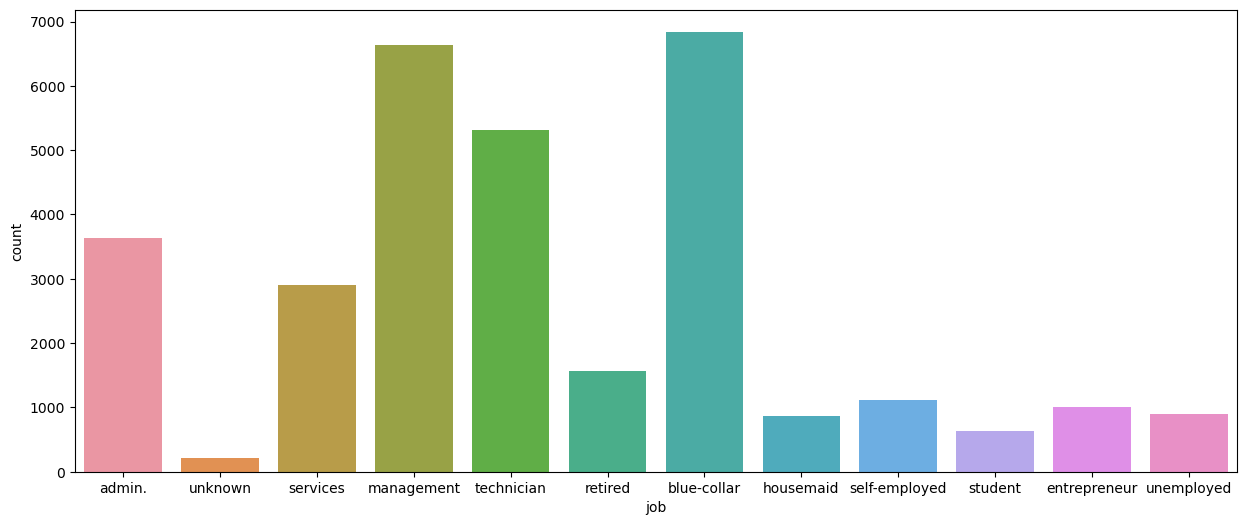

Marital


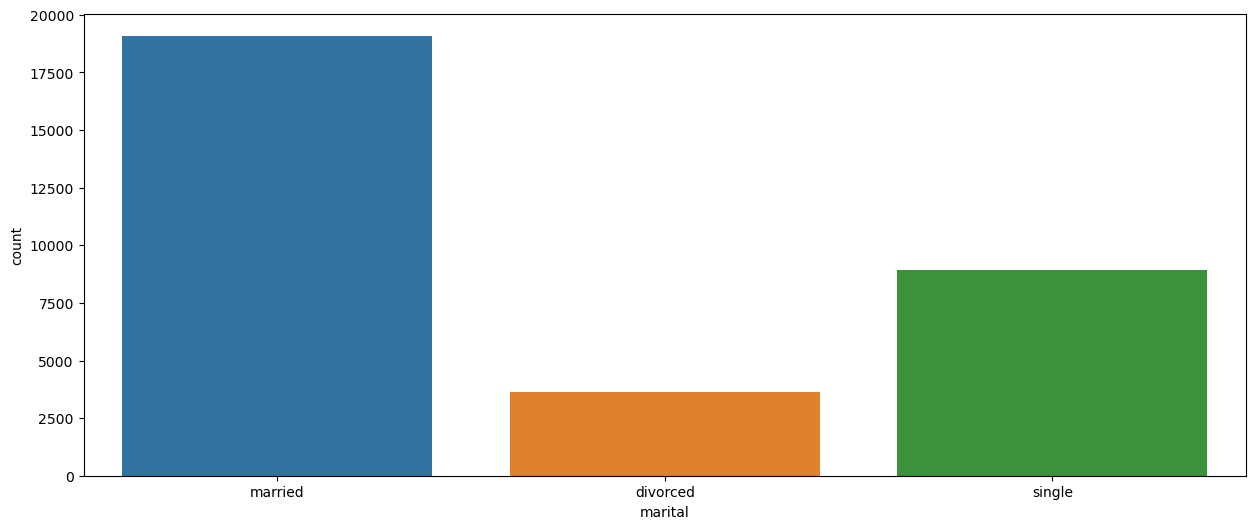

Education


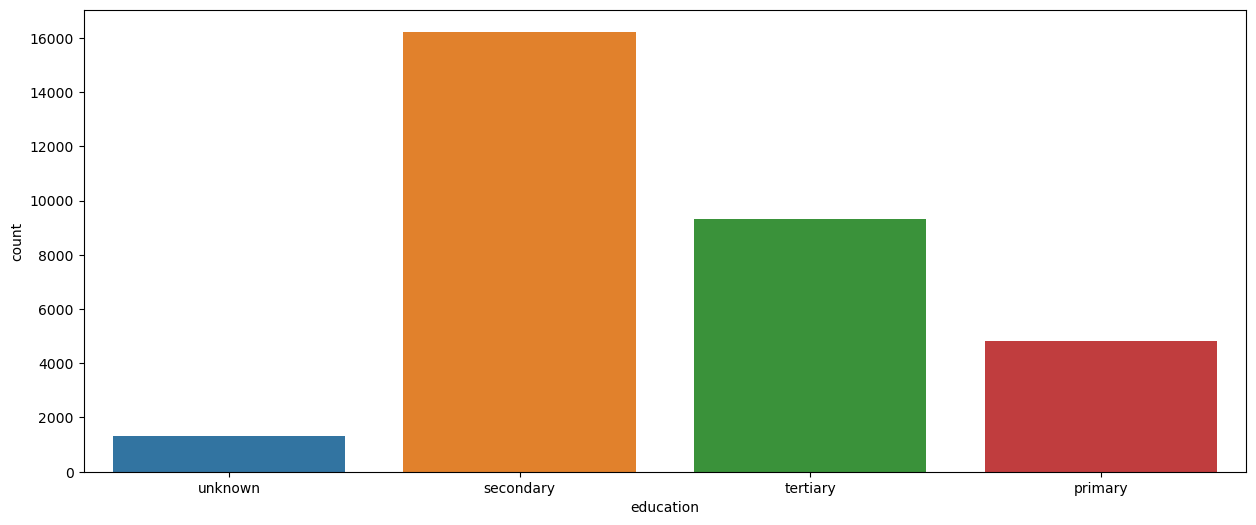

Default


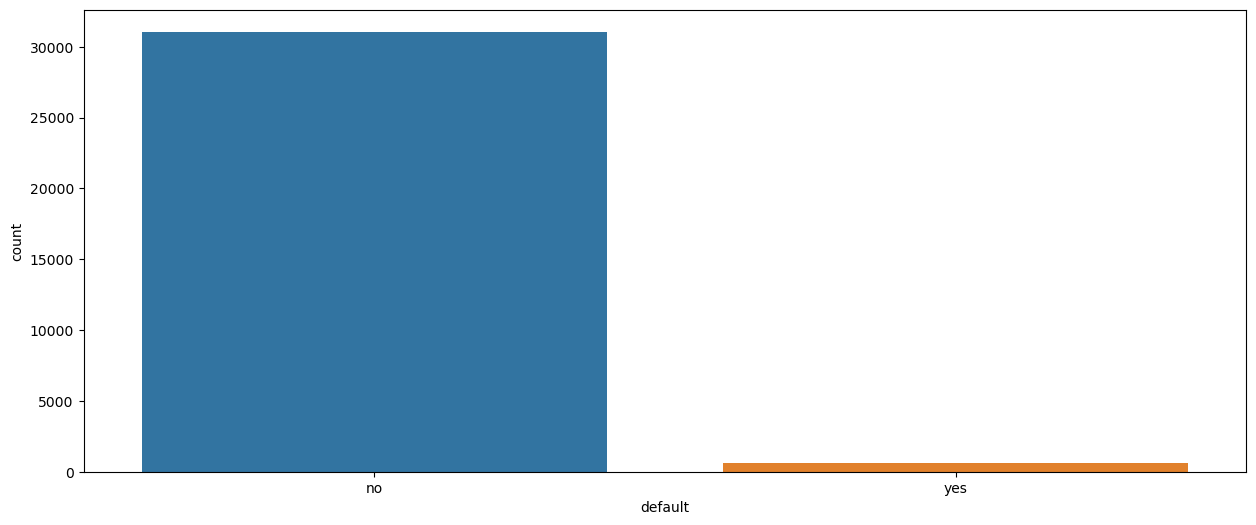

Housing


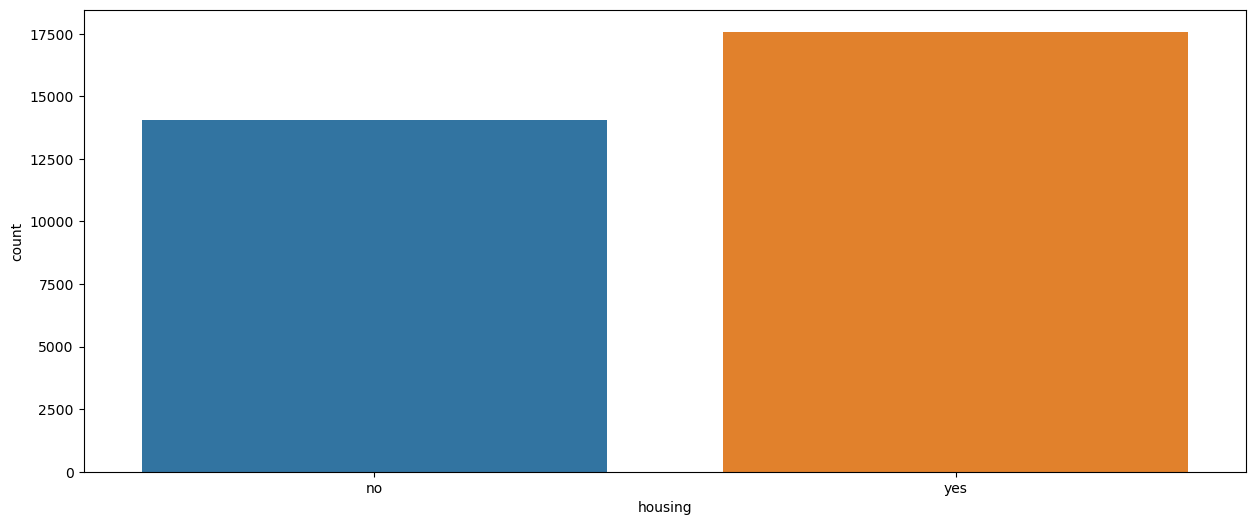

Loan


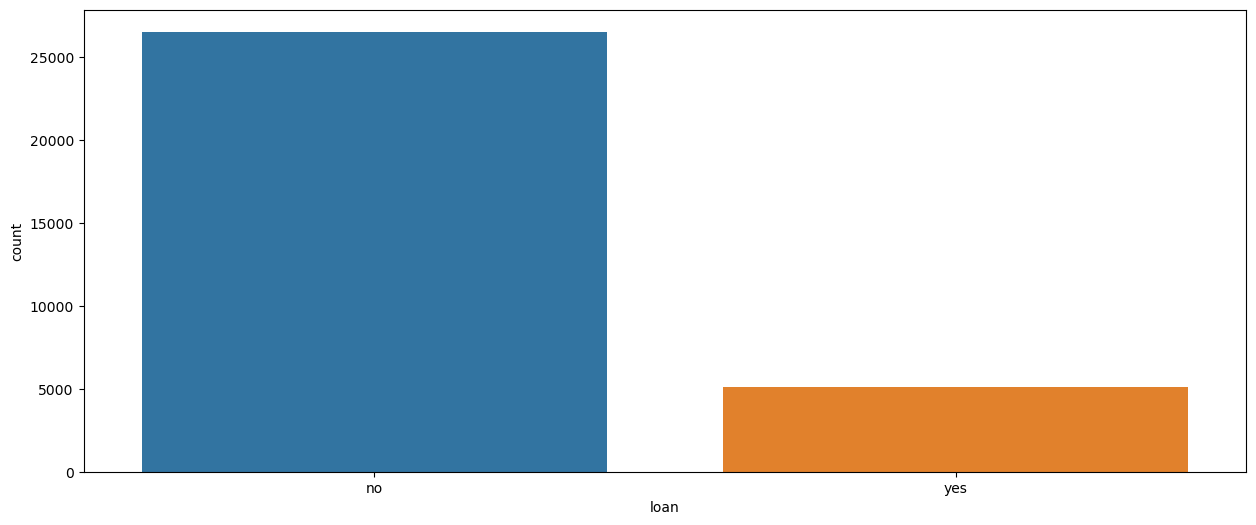

Contact


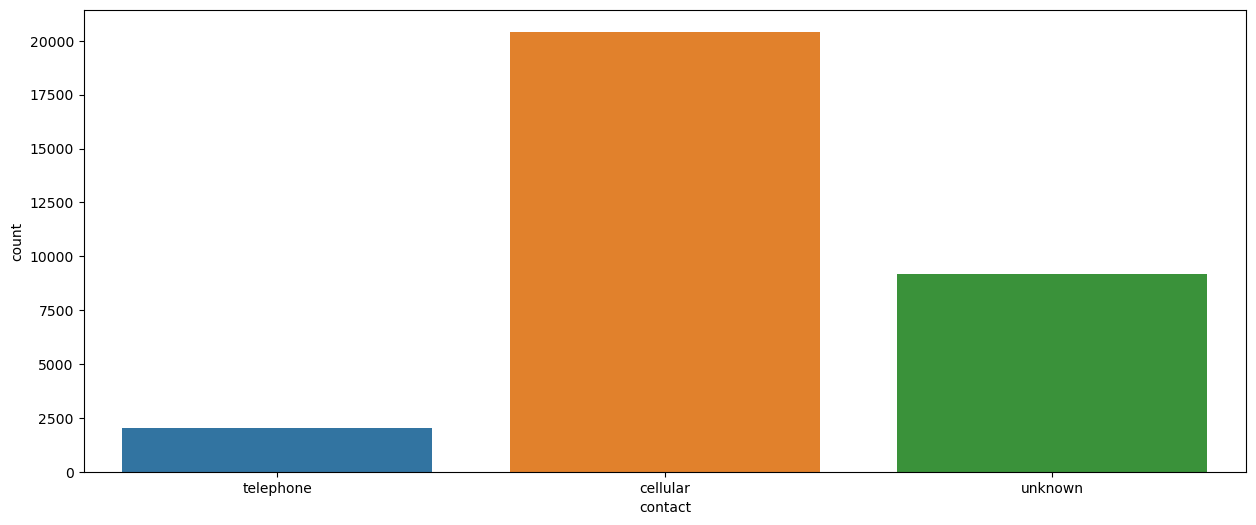

Month


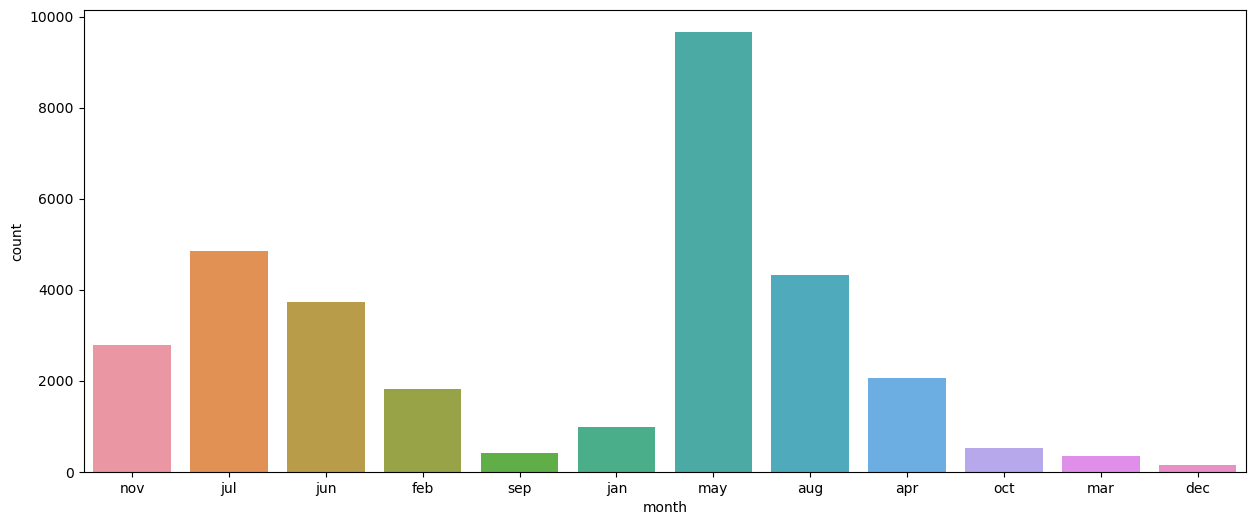

Poutcome


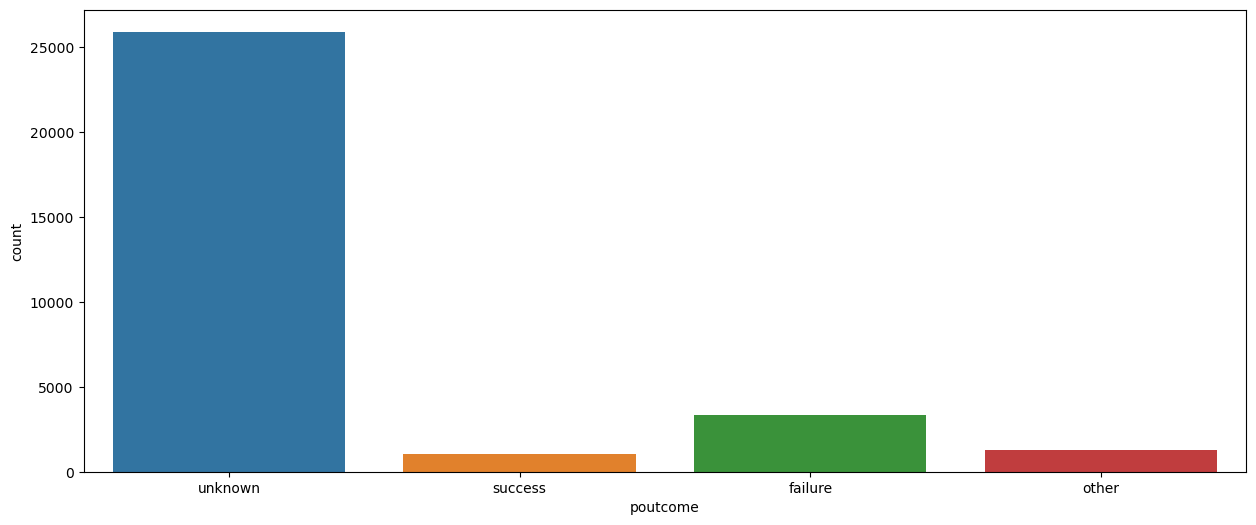

In [19]:
#Plot categorical data
categorical_columns = [column for column in categorical_data if column not in ['subscribed', 'day']]

for column in categorical_columns:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x=td[column])
    plt.show()

In [20]:
# Admin and management are basically the same let's put it under the same categorical value
lst = [td]

for col in lst:
    col.loc[col["job"] == "admin", "job"] = "management"

C:\Users\ARES\AppData\Local\Temp\ipykernel_14756\127848469.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(td.corr(), annot=True)


<Axes: >

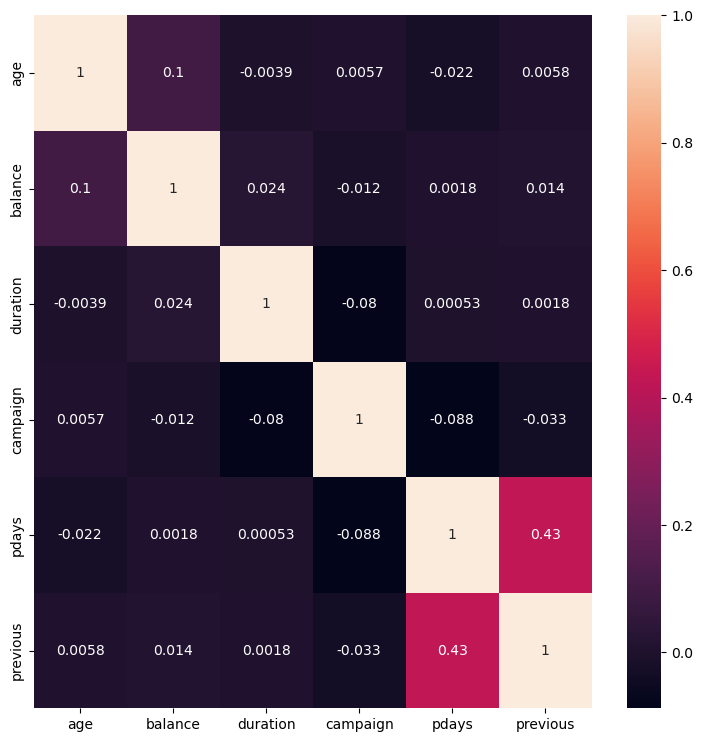

In [21]:
plt.figure(figsize=(9, 9))
sns.heatmap(td.corr(), annot=True)

# Modelling

In [22]:
x = td.drop(columns = ['subscribed'],axis=1)
y = td['subscribed']

In [23]:
categorical_data = categorical_data.drop(columns = ['subscribed'],axis=1)

In [24]:
# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 60% train, 20% validation, 20% test

# Get the indices of categorical columns
categorical_indices = [X_train.columns.get_loc(col) for col in categorical_data]

# Apply SMOTE to the training data
smotenc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_train_S, y_train_S = smotenc.fit_resample(X_train, y_train)

# Define class weights
class_weights = {'no': 1, 'yes': 5}

# Create an instance of CatBoostClassifier with the specified hyperparameters
catboost_model = CatBoostClassifier(n_estimators=100, random_state=42, cat_features=list(categorical_data.columns), class_weights=class_weights)

# Fit the model to the training data
catboost_model.fit(X_train_S, y_train_S)

# Predict on the training, validation, and test sets
y_train_pred = catboost_model.predict(X_train_S)
y_val_pred = catboost_model.predict(X_val)
y_test_pred = catboost_model.predict(X_test)

# Generate the classification reports
train_classification_report = classification_report(y_train_S, y_train_pred)
val_classification_report = classification_report(y_val, y_val_pred)
test_classification_report = classification_report(y_test, y_test_pred)

Learning rate set to 0.381227
0:	learn: 0.4811811	total: 245ms	remaining: 24.2s
1:	learn: 0.3722537	total: 291ms	remaining: 14.3s
2:	learn: 0.3095190	total: 338ms	remaining: 10.9s
3:	learn: 0.2707483	total: 377ms	remaining: 9.06s
4:	learn: 0.2486189	total: 421ms	remaining: 8.01s
5:	learn: 0.2239973	total: 473ms	remaining: 7.41s
6:	learn: 0.2102699	total: 517ms	remaining: 6.88s
7:	learn: 0.1941901	total: 557ms	remaining: 6.41s
8:	learn: 0.1872765	total: 598ms	remaining: 6.05s
9:	learn: 0.1822901	total: 637ms	remaining: 5.73s
10:	learn: 0.1754132	total: 679ms	remaining: 5.49s
11:	learn: 0.1721469	total: 726ms	remaining: 5.32s
12:	learn: 0.1669242	total: 766ms	remaining: 5.13s
13:	learn: 0.1648652	total: 808ms	remaining: 4.97s
14:	learn: 0.1626641	total: 849ms	remaining: 4.81s
15:	learn: 0.1591848	total: 891ms	remaining: 4.68s
16:	learn: 0.1563463	total: 948ms	remaining: 4.63s
17:	learn: 0.1530963	total: 1.02s	remaining: 4.64s
18:	learn: 0.1514630	total: 1.07s	remaining: 4.56s
19:	learn: 

In [25]:
print("Train Classification Report:")
print(train_classification_report)

Train Classification Report:
              precision    recall  f1-score   support

          no       0.99      0.82      0.89     16755
         yes       0.84      0.99      0.91     16755

    accuracy                           0.90     33510
   macro avg       0.91      0.90      0.90     33510
weighted avg       0.91      0.90      0.90     33510



In [26]:
print("Validation Classification Report:")
print(val_classification_report)

Validation Classification Report:
              precision    recall  f1-score   support

          no       0.98      0.80      0.88      5578
         yes       0.38      0.88      0.53       752

    accuracy                           0.81      6330
   macro avg       0.68      0.84      0.71      6330
weighted avg       0.91      0.81      0.84      6330



In [27]:
print("Test Classification Report:")
print(test_classification_report)

Test Classification Report:
              precision    recall  f1-score   support

          no       0.98      0.80      0.88      5599
         yes       0.36      0.87      0.51       731

    accuracy                           0.81      6330
   macro avg       0.67      0.83      0.69      6330
weighted avg       0.91      0.81      0.84      6330



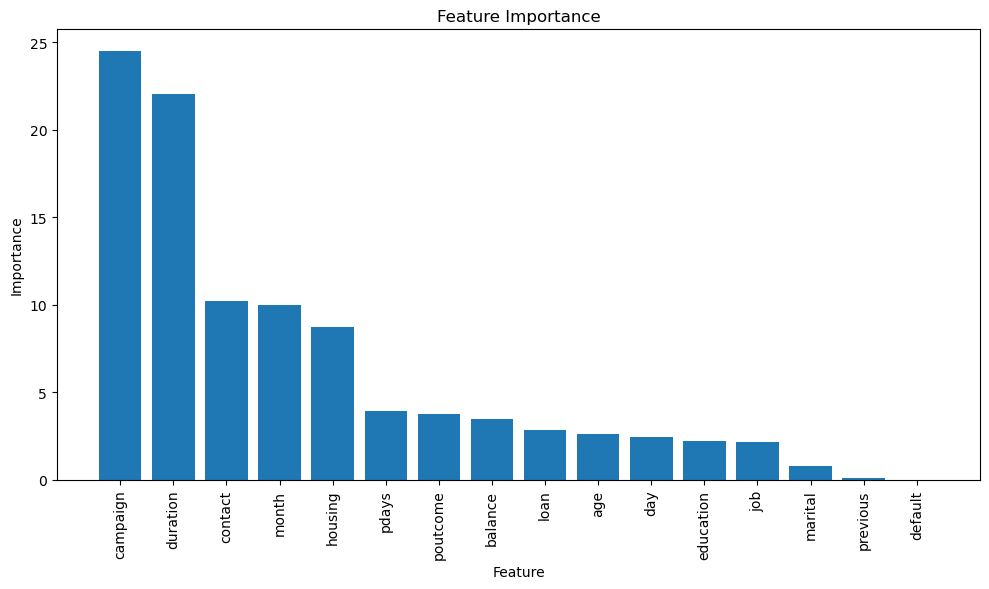

In [28]:
importances = catboost_model.feature_importances_
feature_names = x.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()